In [12]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import math
from scipy.stats import linregress
import os
import pandas as pd

In [46]:
filename = 'C50.csv'
name = os.path.splitext(filename)[0]
vmeas, wlmeas, v, λ, f = np.loadtxt(filename,skiprows=1, delimiter=',', unpack=True)

In [47]:
d = 5.0e-3
d2 = d**2

In [48]:
eta = 1.002e-3
rho = 1000
dynamic = eta/rho

In [49]:
Re = []
for i in range(0,len(v)):
    Re.append(((d*v[i])/dynamic))

In [50]:
Ro = []
for i in range(0,len(λ)):
    Ro.append(10*(d2*λ[i])/dynamic)

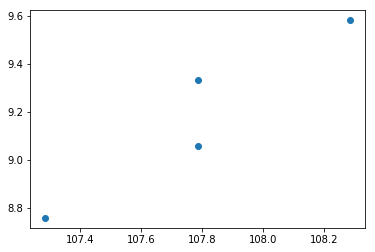

In [51]:
plt.plot(Re,Ro,'o')

In [52]:
stat = linregress(Re,Ro)

In [53]:
stat

LinregressResult(slope=0.82499999999999, intercept=-79.74051896207476, rvalue=0.947900232875353, pvalue=0.05209976712464703, stderr=0.1960548392669742)

In [54]:
x = np.arange(min(Re)-5,max(Re)+5,1)

In [55]:
y = (stat[0]*x + stat[1])

In [56]:
plt.plot(Re,Ro,'o',label= 'Collected Data')
plt.plot(x,y, label='Fitted Data')
plt.plot([], [], ' ', label="σ = %.3f" % stat[4]) 
plt.plot([], [], ' ', label="R = %.3f" % stat[2])
plt.plot([], [], ' ', label="$R^2$ = %.3f" % (stat[2]*stat[2]))
plt.xlabel('Re')
plt.ylabel('Ro')
plt.legend(loc='best')
plt.suptitle(name + ' Roshko vs. Reynolds')
plt.savefig(name + 'RoRe.svg', bbox_inches='tight')
plt.close()